In [1]:
%matplotlib inline
from pathlib import Path

datasets_path = Path("../datasets")

In [2]:
import polars as pl
import polars.selectors as cs

train_csv_path = datasets_path / "train.csv"
test_csv_path = datasets_path / "test.csv"

train_df = pl.read_csv(train_csv_path)
test_df = pl.read_csv(test_csv_path).with_columns(pl.lit(None).alias("charges"))
merged_df = pl.concat([train_df, test_df])

In [3]:
train_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",1600.0,1600.0,"""1600""",1600.0,1600.0,"""1600""","""1600""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",1007.8625,38.985,null,32.424376,1.014375,null,null,0.30625
"""std""",575.26841,13.555012,null,5.766915,1.259031,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",516.0,27.0,null,28.638079,0.0,null,null,0.0
"""50%""",1011.0,40.0,null,32.270707,1.0,null,null,0.0
"""75%""",1509.0,50.0,null,37.066816,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


In [4]:
test_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",400.0,400.0,"""400""",400.0,400.0,"""400""","""400""",0.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",966.05,39.23,null,32.668659,0.9425,null,null,null
"""std""",585.848127,12.990149,null,5.9328,1.219801,null,null,null
"""min""",13.0,18.0,"""female""",21.848978,0.0,"""no""","""northeast""",null
"""25%""",432.0,28.0,null,28.712189,0.0,null,null,null
"""50%""",972.0,40.0,null,32.288571,0.0,null,null,null
"""75%""",1458.0,50.0,null,37.110462,2.0,null,null,null
"""max""",1995.0,64.0,"""male""",46.890354,5.0,"""yes""","""southwest""",null


In [5]:
merged_df.describe()

statistic,id,age,sex,bmi,children,smoker,region,charges
str,f64,f64,str,f64,f64,str,str,f64
"""count""",2000.0,2000.0,"""2000""",2000.0,2000.0,"""2000""","""2000""",1600.0
"""null_count""",0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",400.0
"""mean""",999.5,39.034,null,32.473233,1.0,null,null,0.30625
"""std""",577.494589,13.4411,null,5.799794,1.251312,null,null,0.628656
"""min""",0.0,18.0,"""female""",20.627626,0.0,"""no""","""northeast""",0.0
"""25%""",500.0,27.0,null,28.645793,0.0,null,null,0.0
"""50%""",1000.0,40.0,null,32.275964,1.0,null,null,0.0
"""75%""",1499.0,50.0,null,37.092476,2.0,null,null,0.0
"""max""",1999.0,64.0,"""male""",47.290644,5.0,"""yes""","""southwest""",2.0


## 特徴量の生成

### bmi

In [6]:
# https://www.e-healthnet.mhlw.go.jp/information/food/e-02-001.html

bmi_col = pl.col("bmi")
bmi_enum = pl.Enum(
    [
        "Underweight",
        "Normal range",
        "Pre-obese",
        "Obese class I",
        "Obese class II",
        "Obese class III",
    ]
)
bmi_class = merged_df.select(
    pl.when(bmi_col < 18.5)
    .then(pl.lit("Underweight"))
    .when(bmi_col < 25.0)
    .then(pl.lit("Normal range"))
    .when(bmi_col < 30.0)
    .then(pl.lit("Pre-obese"))
    .when(bmi_col < 35.0)
    .then(pl.lit("Obese class I"))
    .when(bmi_col < 40.0)
    .then(pl.lit("Obese class II"))
    .otherwise(pl.lit("Obese class III"))
    .cast(pl.Categorical)
    .alias("bmi_class")
)

bmi_mean_diff = merged_df.select((bmi_col.mean() - bmi_col).alias("bmi_mean_diff"))
bmi_std_diff = merged_df.select((bmi_col.std() - bmi_col).alias("bmi_std_diff"))


bmi_square = merged_df.select((bmi_col * bmi_col).alias("bmi_square"))

/tmp/ipykernel_1778/3464130977.py:14: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  bmi_class = merged_df.select(


### 年齢

In [7]:
# http://jaee.umin.jp/doc/agegroup.pdf

age_col = pl.col("age")

age_enum = pl.Enum(
    [
        "infant",
        "lower_elementary",
        "higher_elementary",
        "junior_high",
        "senior_high",
        "young_adult",
        "old_adult",
        "young_elder",
        "old_elder",
    ]
)
age_class = merged_df.select(
    pl.when(age_col < 6)
    .then(pl.lit("infant"))
    .when(age_col < 9)
    .then(pl.lit("lower_elementary"))
    .when(age_col < 12)
    .then(pl.lit("higher_elementary"))
    .when(age_col < 15)
    .then(pl.lit("junior_high"))
    .when(age_col < 18)
    .then(pl.lit("senior_high"))
    .when(age_col < 39)
    .then(pl.lit("young_adult"))
    .when(age_col < 64)
    .then(pl.lit("old_adult"))
    .when(age_col < 74)
    .then(pl.lit("young_elder"))
    .otherwise(pl.lit("old_elder"))
    .cast(pl.Categorical)
    .alias("age_class")
)

age_mean_diff = merged_df.select((age_col.mean() - age_col).alias("age_mean_diff"))
age_std_diff = merged_df.select((age_col.std() - age_col).alias("age_std_diff"))

age_square = merged_df.select((age_col * age_col).alias("age_square"))

In [8]:
all_data = pl.concat(
    [
        merged_df,
        bmi_class,
        bmi_mean_diff,
        bmi_std_diff,
        bmi_square,
        age_class,
        age_mean_diff,
        age_std_diff,
        age_square,
    ],
    how="horizontal",
).with_columns(cs.string().cast(pl.Categorical))

all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square
i64,i64,cat,f64,i64,cat,cat,i64,cat,f64,f64,f64,cat,f64,f64,i64
0,26,"""male""",32.665465,3,"""no""","""southeast""",0,"""Obese class I""",-0.192232,-26.865671,1067.032581,"""young_adult""",13.034,-12.5589,676
1,41,"""male""",29.798725,1,"""no""","""southwest""",0,"""Pre-obese""",2.674508,-23.998931,887.963996,"""old_adult""",-1.966,-27.5589,1681
2,28,"""male""",32.722029,0,"""yes""","""northwest""",1,"""Obese class I""",-0.248796,-26.922235,1070.731191,"""young_adult""",11.034,-14.5589,784
3,20,"""female""",38.429831,2,"""no""","""southeast""",0,"""Obese class II""",-5.956598,-32.630037,1476.85191,"""young_adult""",19.034,-6.5589,400
4,45,"""female""",29.641854,1,"""no""","""northwest""",0,"""Pre-obese""",2.831379,-23.84206,878.639491,"""old_adult""",-5.966,-31.5589,2025
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,"""female""",24.91598,1,"""no""","""northwest""",null,"""Normal range""",7.557252,-19.116187,620.806079,"""old_adult""",-7.966,-33.5589,2209
1972,18,"""female""",44.752922,0,"""no""","""southeast""",null,"""Obese class III""",-12.279689,-38.953128,2002.824048,"""young_adult""",21.034,-4.5589,324
1979,33,"""female""",37.203015,0,"""yes""","""southeast""",null,"""Obese class II""",-4.729783,-31.403222,1384.064357,"""young_adult""",6.034,-19.5589,1089


In [9]:
categorical_features = (
    all_data.select(
        cs.string(include_categorical=True),
        pl.col(pl.Enum),
    )
    .select(pl.exclude("charges"))
    .columns
)

In [10]:
categorical_features

['sex', 'smoker', 'region', 'bmi_class', 'age_class']

In [11]:
all_data = all_data.with_columns(cs.categorical().to_physical().cast(pl.Int32))

In [12]:
all_data

id,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_mean_diff,bmi_std_diff,bmi_square,age_class,age_mean_diff,age_std_diff,age_square
i64,i64,i32,f64,i64,i32,i32,i64,i32,f64,f64,f64,i32,f64,f64,i64
0,26,0,32.665465,3,0,0,0,0,-0.192232,-26.865671,1067.032581,0,13.034,-12.5589,676
1,41,0,29.798725,1,0,1,0,1,2.674508,-23.998931,887.963996,1,-1.966,-27.5589,1681
2,28,0,32.722029,0,1,2,1,0,-0.248796,-26.922235,1070.731191,0,11.034,-14.5589,784
3,20,1,38.429831,2,0,0,0,2,-5.956598,-32.630037,1476.85191,0,19.034,-6.5589,400
4,45,1,29.641854,1,0,2,0,1,2.831379,-23.84206,878.639491,1,-5.966,-31.5589,2025
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1968,47,1,24.91598,1,0,2,null,4,7.557252,-19.116187,620.806079,1,-7.966,-33.5589,2209
1972,18,1,44.752922,0,0,0,null,3,-12.279689,-38.953128,2002.824048,0,21.034,-4.5589,324
1979,33,1,37.203015,0,1,0,null,2,-4.729783,-31.403222,1384.064357,0,6.034,-19.5589,1089


In [13]:
from sklearn.model_selection import train_test_split

train_data = (
    train_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .to_pandas()
)


train_features = train_data.loc[:, ~train_data.columns.isin(["id", "charges"])]
train_objective = train_data["charges"]

# from imblearn.under_sampling import RandomUnderSampler


# train_features, train_objective = RandomUnderSampler(random_state=123).fit_resample(
#     train_features, train_objective
# )

train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1600 non-null   int64  
 1   sex            1600 non-null   int32  
 2   bmi            1600 non-null   float64
 3   children       1600 non-null   int64  
 4   smoker         1600 non-null   int32  
 5   region         1600 non-null   int32  
 6   bmi_class      1600 non-null   int32  
 7   bmi_mean_diff  1600 non-null   float64
 8   bmi_std_diff   1600 non-null   float64
 9   bmi_square     1600 non-null   float64
 10  age_class      1600 non-null   int32  
 11  age_mean_diff  1600 non-null   float64
 12  age_std_diff   1600 non-null   float64
 13  age_square     1600 non-null   int64  
dtypes: float64(6), int32(5), int64(3)
memory usage: 143.9 KB


In [14]:
test_data = (
    test_df.select(pl.col("id"))
    .join(all_data, on=pl.col("id"), how="inner")
    .to_pandas()
)
test_features = test_data.loc[:, ~test_data.columns.isin(["id", "charges"])]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             400 non-null    int64  
 1   age            400 non-null    int64  
 2   sex            400 non-null    int32  
 3   bmi            400 non-null    float64
 4   children       400 non-null    int64  
 5   smoker         400 non-null    int32  
 6   region         400 non-null    int32  
 7   charges        0 non-null      float64
 8   bmi_class      400 non-null    int32  
 9   bmi_mean_diff  400 non-null    float64
 10  bmi_std_diff   400 non-null    float64
 11  bmi_square     400 non-null    float64
 12  age_class      400 non-null    int32  
 13  age_mean_diff  400 non-null    float64
 14  age_std_diff   400 non-null    float64
 15  age_square     400 non-null    int64  
dtypes: float64(7), int32(5), int64(4)
memory usage: 42.3 KB


In [15]:
import lightgbm as lgb

from sklearn.metrics import f1_score
import numpy as np


def f1_macro_score(y_pred: np.ndarray, data: lgb.Dataset):
    y_true = data.get_label()

    y_pred = y_pred.reshape(len(np.unique(y_true)), -1).argmax(axis=0)
    score = f1_score(y_true, y_pred, average="macro")

    return "macro_f1", score, True

In [16]:
params = {
    "task": "train",
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "first_metric_only": True,
    "num_class": 3,
    "random_state": 123,
    "device": "cuda",
    "importance_type": "gain",
    # Parameters
    "learning_rate": 0.005,
    "num_leaves": 34,
    "extra_trees": True,
    "feature_fraction": 0.9,  # default = 1.0
    "bagging_freq": 1,  # default = 0
    "bagging_fraction": 0.9,
    "lambda_l1": 0.05,
    "lambda_l2": 0.05,
    "verbose": -1,
}

fit_params = {
    "callbacks": [
        lgb.early_stopping(stopping_rounds=100, verbose=True),
        lgb.log_evaluation(100),
    ],
    "feval": f1_macro_score,
}

Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.451739	valid_0's multi_logloss: 0.458551
[200]	training's multi_logloss: 0.372218	valid_0's multi_logloss: 0.388998
[300]	training's multi_logloss: 0.329705	valid_0's multi_logloss: 0.35869
[400]	training's multi_logloss: 0.299572	valid_0's multi_logloss: 0.343283
[500]	training's multi_logloss: 0.27551	valid_0's multi_logloss: 0.334994
[600]	training's multi_logloss: 0.255309	valid_0's multi_logloss: 0.331186
[700]	training's multi_logloss: 0.237499	valid_0's multi_logloss: 0.329706
[800]	training's multi_logloss: 0.221178	valid_0's multi_logloss: 0.329515
Early stopping, best iteration is:
[768]	training's multi_logloss: 0.226231	valid_0's multi_logloss: 0.329221
----- fold 0 -----
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       252
           1       0.57      0.33      0.42        39
           2       0.73      0.83      0.77     

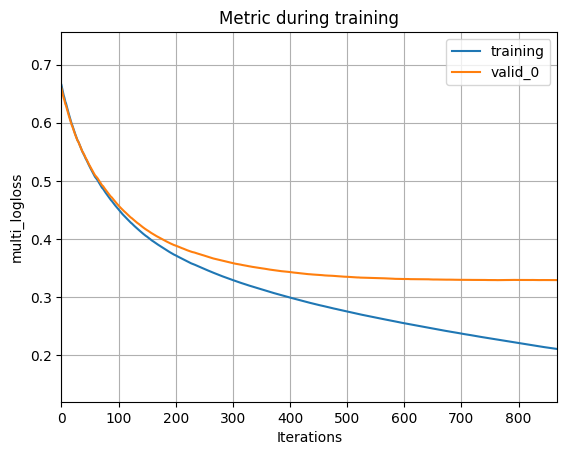

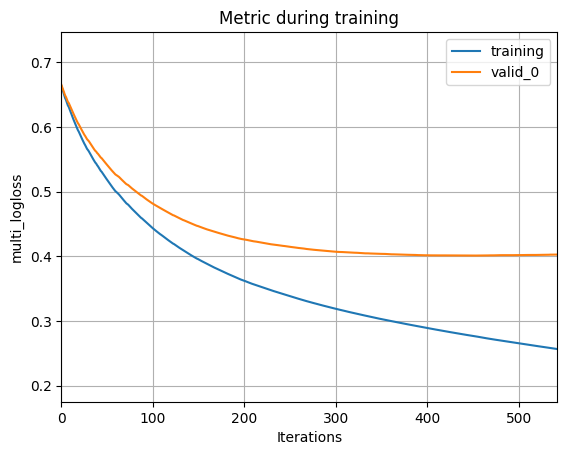

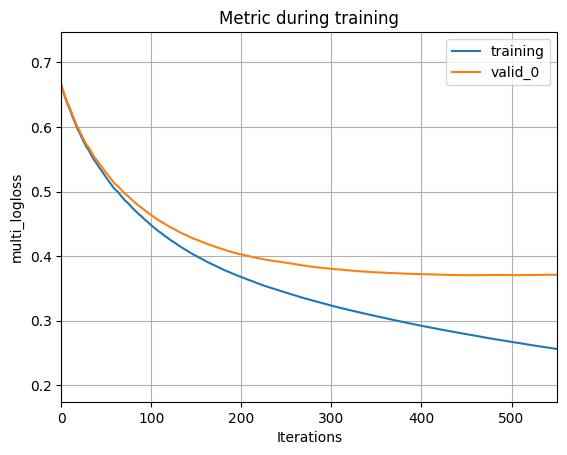

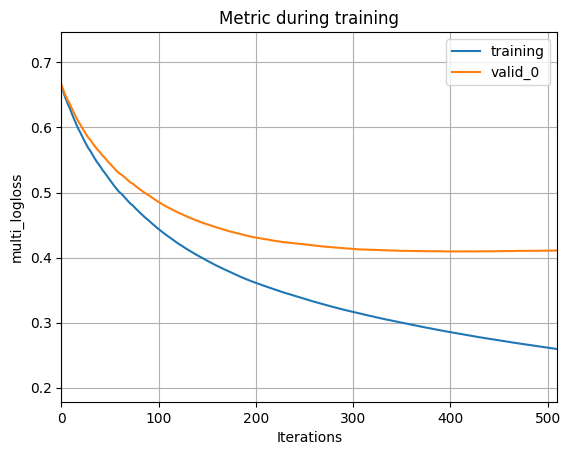

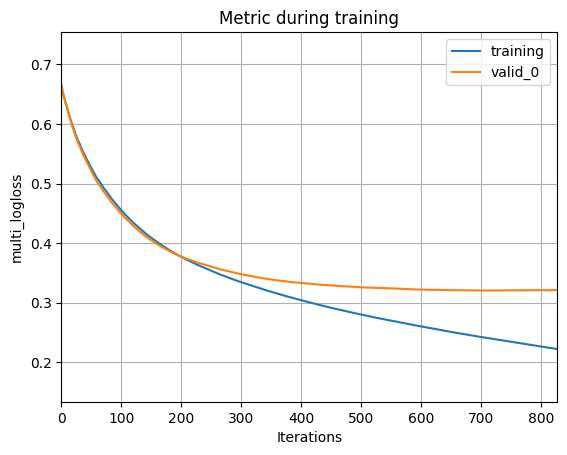

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

FOLD = 5
models = []
kf = StratifiedKFold(n_splits=FOLD, shuffle=True, random_state=123)


for fold, (train_indices, valid_indices) in enumerate(
    kf.split(train_features, train_objective)
):
    X_train, X_valid = (
        train_features.iloc[train_indices],
        train_features.iloc[valid_indices],
    )
    y_train, y_valid = (
        train_objective.iloc[train_indices],
        train_objective.iloc[valid_indices],
    )

    # train_weight = compute_sample_weight(class_weight="balanced", y=y_train).astype(
    #     "float32"
    # )

    lgb_train = lgb.Dataset(
        X_train,
        label=y_train,
        # weight=train_weight,
        categorical_feature=categorical_features,
    )
    lgb_valid = lgb.Dataset(
        X_valid, label=y_valid, categorical_feature=categorical_features
    )
    evals_result = {}

    model = lgb.train(
        params=params,
        train_set=lgb_train,
        num_boost_round=1000000,
        valid_sets=[lgb_valid, lgb_train],
        # feval=fit_params["feval"],
        callbacks=fit_params["callbacks"] + [lgb.record_evaluation(evals_result)],
    )

    print(f"----- fold {fold} -----")
    y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    y_valid_pred = np.argmax(y_valid_pred, axis=1)
    print(classification_report(y_valid, y_valid_pred))

    lgb.plot_metric(evals_result, "multi_logloss")

    models.append(model)

/tmp/ipykernel_1778/966333900.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


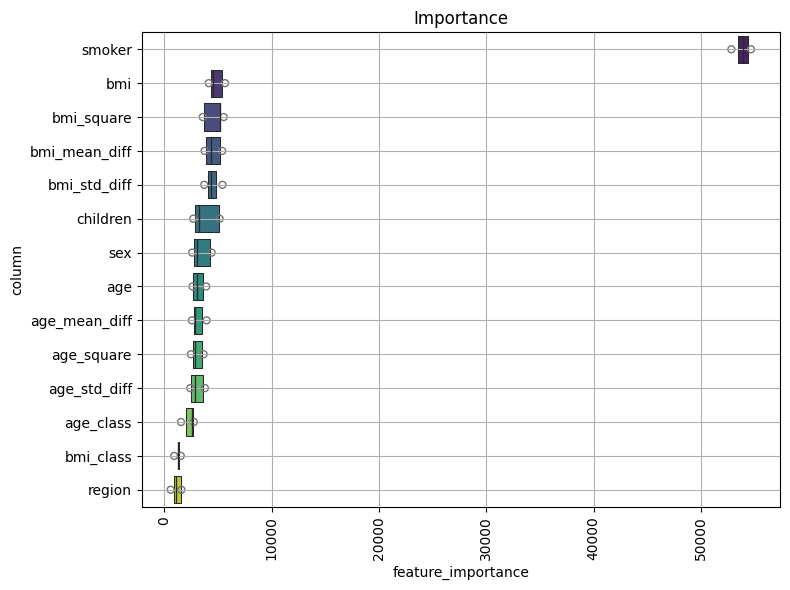

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importance(importance_type="gain")

        _df["column"] = feat_train_df.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat(
            [feature_importance_df, _df], axis=0, ignore_index=True
        )

    order = (
        feature_importance_df.groupby("column")
        .sum()[["feature_importance"]]
        .sort_values("feature_importance", ascending=False)
        .index[:50]
    )

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * 0.25)))
    sns.boxenplot(
        data=feature_importance_df,
        x="feature_importance",
        y="column",
        order=order,
        ax=ax,
        palette="viridis",
        orient="h",
    )
    ax.tick_params(axis="x", rotation=90)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax


fig, ax = visualize_importance(models, train_features)